In [1]:
# This code compute preliminary statistical analyses on RS CLOSED DATA
# 1) Descriptive statistics
# 2) Linear mixed model on every region with group and resting state block as fixed effects, and subject ID as random effect
# 3) Clustering of ASD subject based on general IQ
# 2) Linear mixed model on every region with IQ-based subgroups and resting state block as fixed effects, and subject ID as random effect


# Import libraries and set directories

import os
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# environment name: explore_cmifoof

# Set paths
main = '/Users/inesseverino/Library/CloudStorage/OneDrive-FondazioneIstitutoItalianoTecnologia/PythonCourse/python-cimec-ines-severino/'
#data_path = os.path.join(main, "data")


data = pd.read_csv(os.path.join(main, "rs_open_alpha_regions_AllBlocks.csv"))


In [2]:
# Set parameter of interest

parameter = "alpha_amplitude"

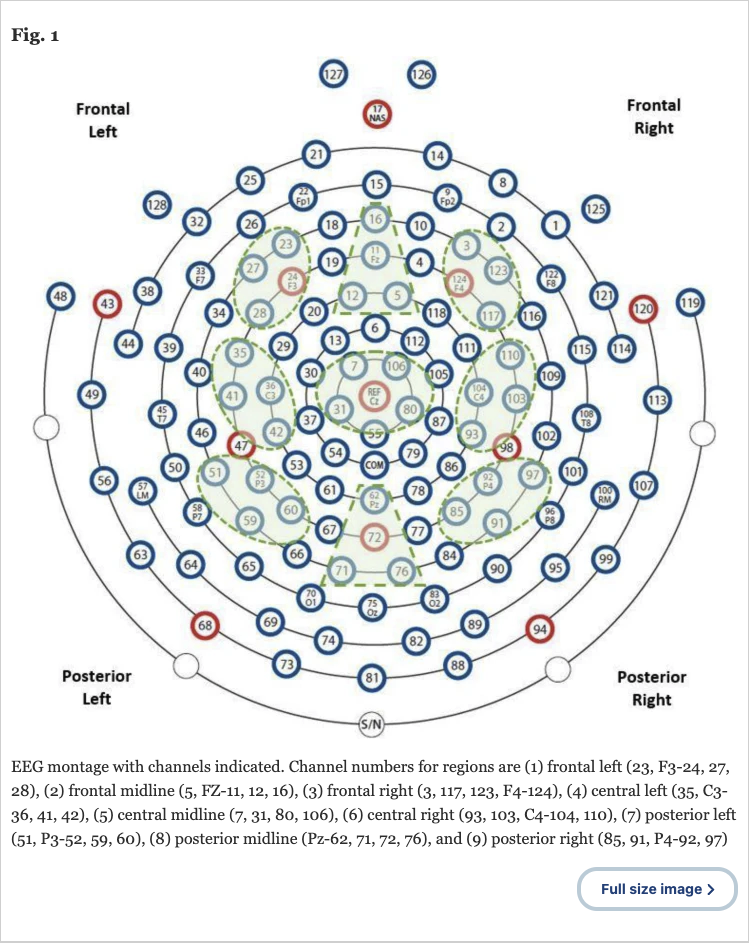

In [4]:
# Load infos about EEG montage and display regions channels

from IPython.display import Image, display

# Load and display an image
image_path = os.path.join(main, "EEG_regions_electrodes.png") # Update this to the path of your image file
display(Image(filename=image_path))


# Read channel dictonaries, defining for each area the number of the electrodes
channel_dict = {
        "frontal_left": [23, 24, 27, 28],
        "frontal_midline": [5, 11, 12, 16],
        "frontal_right": [3, 117, 123, 124],
        "central_left": [ 35, 36, 41, 42],
        "central_midline": [7, 31, 80, 106],
        "central_right": [93, 103, 104, 110],
        "posterior_left": [51, 52, 59, 60],
        "posterior_midline": [62, 71, 72, 76],
        "posterior_right": [85, 91, 92, 97]
                 }



In [5]:
# Compute descriptive statistics

asd_data = data[data['diagnosis']=="ASD"]
td_data = data[data['diagnosis']=="TD"]

for region in channel_dict.keys():

    # Get the name of each region
    region_column = f"{parameter}_{region}"
    
    asd_data_region = asd_data[region_column]
    td_data_region = td_data[region_column]

    # Print values
    print(f"Mean value for {region_column} in ASD is {asd_data[region_column].mean()}")
    print(f"Mean value for {region_column} in TD is {td_data[region_column].mean()}")
    print(f"Standard Deviation for {region_column} in ASD is {asd_data[region_column].std()}")
    print(f"Standard Deviation for {region_column} in TD is {td_data[region_column].std()}")

Mean value for alpha_amplitude_frontal_left in ASD is 0.6749506748499049
Mean value for alpha_amplitude_frontal_left in TD is 0.6733351507370801
Standard Deviation for alpha_amplitude_frontal_left in ASD is 0.26117531469059185
Standard Deviation for alpha_amplitude_frontal_left in TD is 0.2631257847056241
Mean value for alpha_amplitude_frontal_midline in ASD is 0.6717024147381333
Mean value for alpha_amplitude_frontal_midline in TD is 0.6557767191193999
Standard Deviation for alpha_amplitude_frontal_midline in ASD is 0.2573703794906929
Standard Deviation for alpha_amplitude_frontal_midline in TD is 0.2597756464464812
Mean value for alpha_amplitude_frontal_right in ASD is 0.6731413575186475
Mean value for alpha_amplitude_frontal_right in TD is 0.6684016856917226
Standard Deviation for alpha_amplitude_frontal_right in ASD is 0.25746357323368185
Standard Deviation for alpha_amplitude_frontal_right in TD is 0.2594674338395153
Mean value for alpha_amplitude_central_left in ASD is 0.77457858

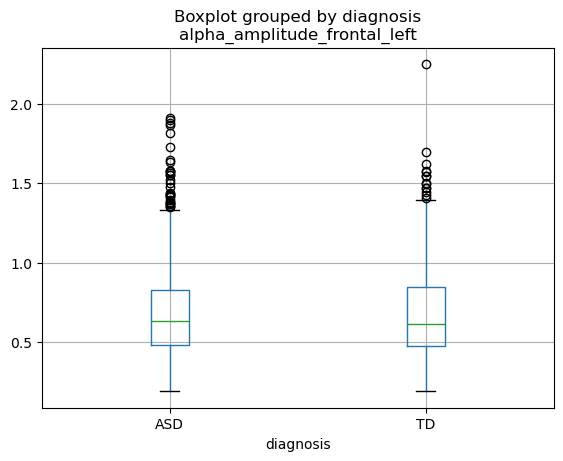

PearsonRResult(statistic=-0.05295447094907932, pvalue=0.03439959897788815)


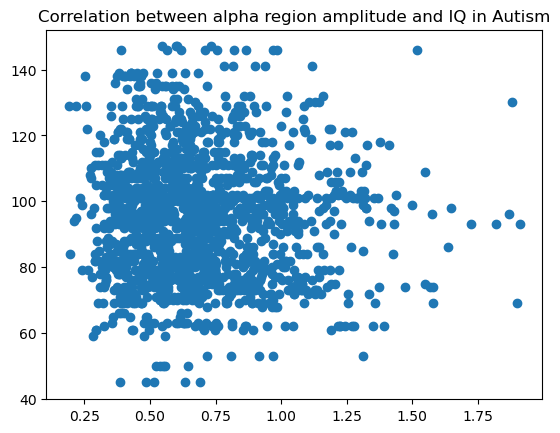

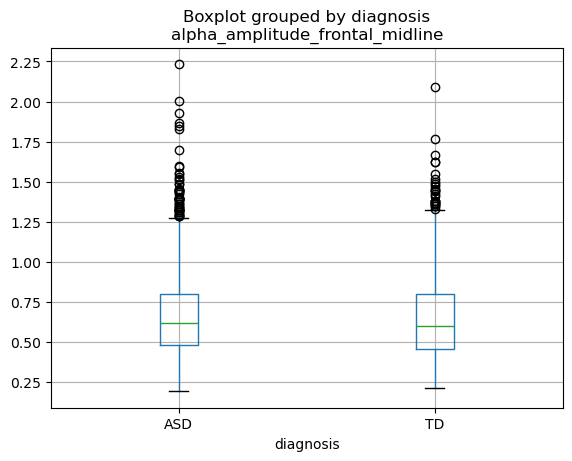

PearsonRResult(statistic=-0.05898007159287251, pvalue=0.01834033116295616)


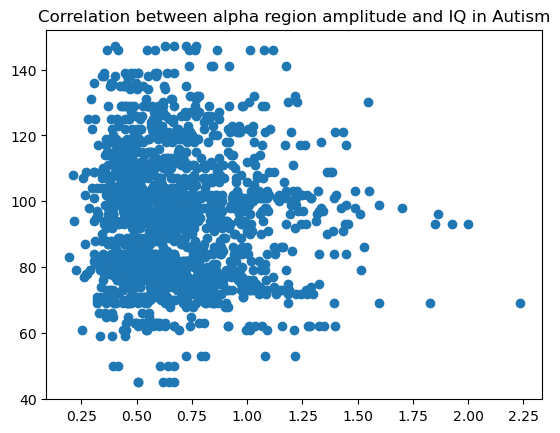

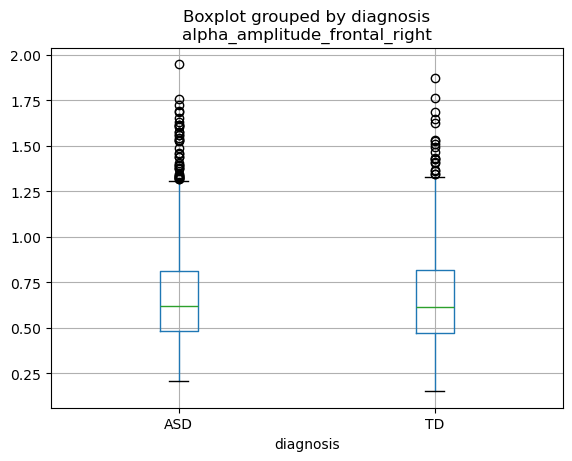

PearsonRResult(statistic=-0.060224117903484864, pvalue=0.01582023674810291)


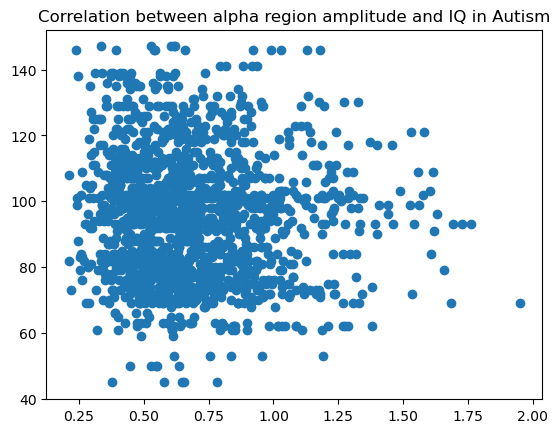

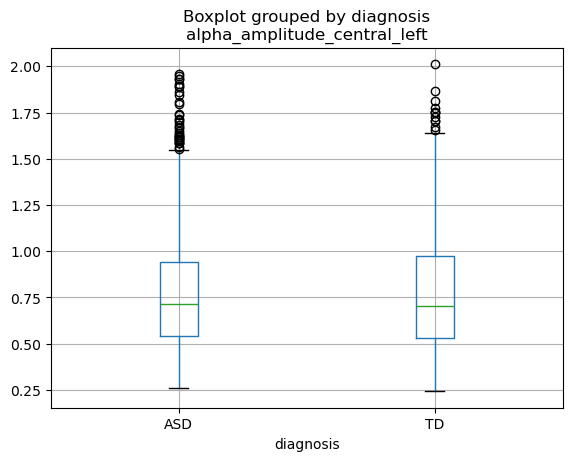

PearsonRResult(statistic=-0.07212186184210559, pvalue=0.0036065596713217014)


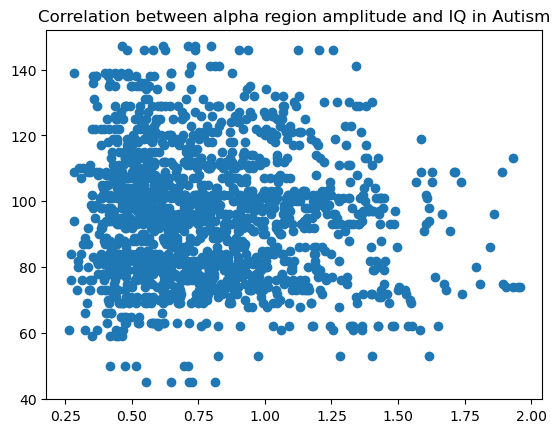

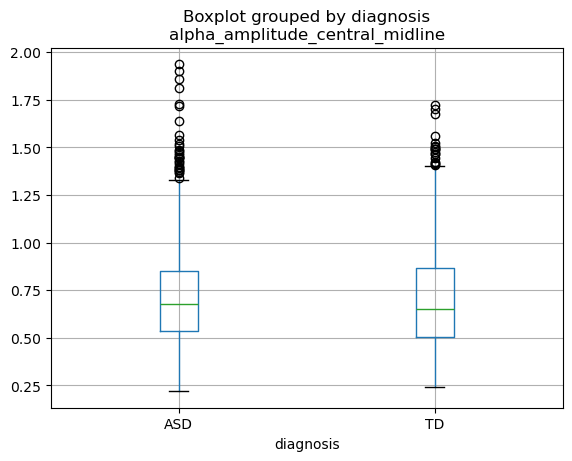

PearsonRResult(statistic=-0.04601788591229263, pvalue=0.06381761025581068)


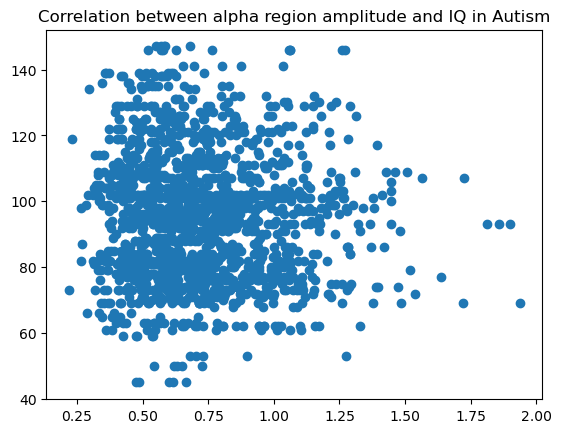

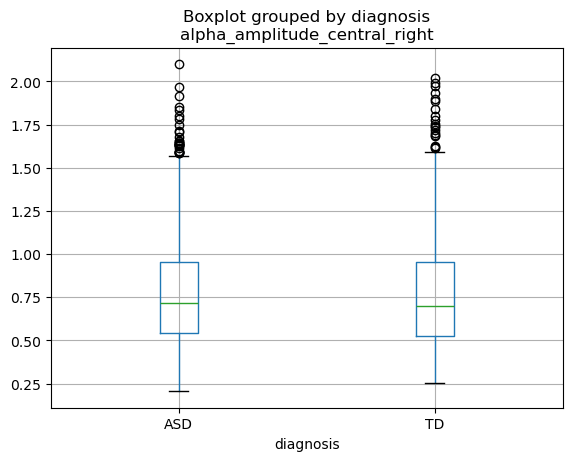

PearsonRResult(statistic=-0.06450466332653416, pvalue=0.00925260987259175)


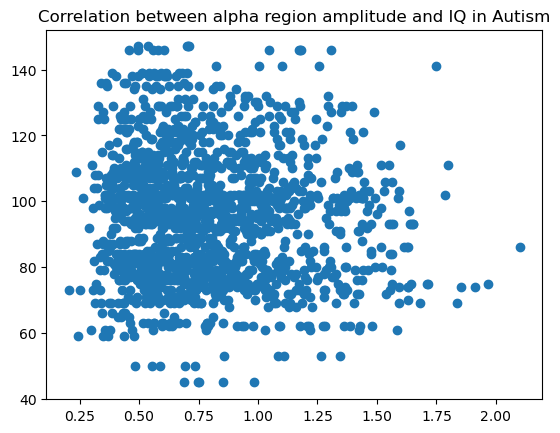

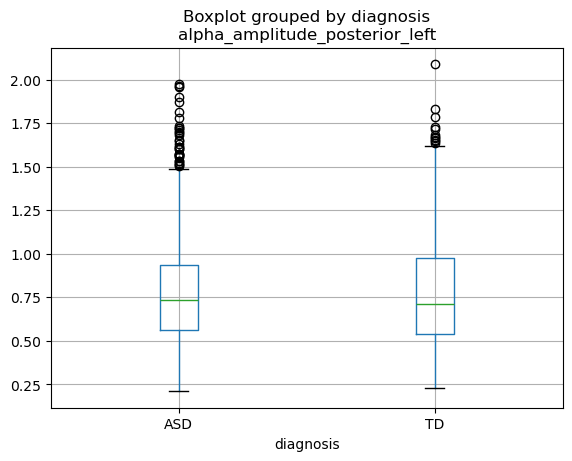

PearsonRResult(statistic=-0.03688493151477057, pvalue=0.13697349868809158)


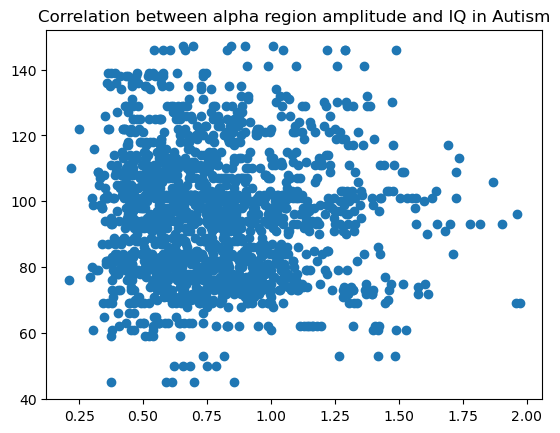

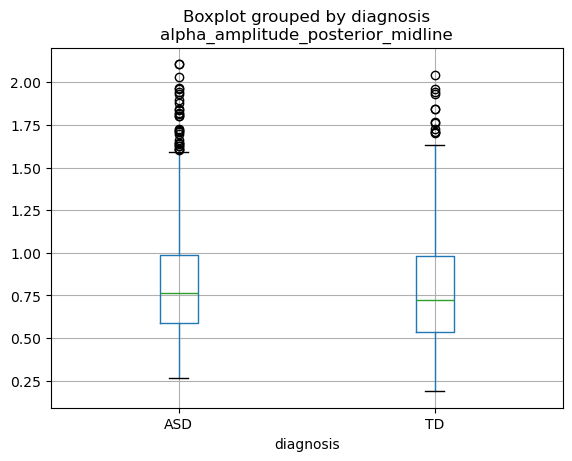

PearsonRResult(statistic=-0.017517839367447642, pvalue=0.4817445756034968)


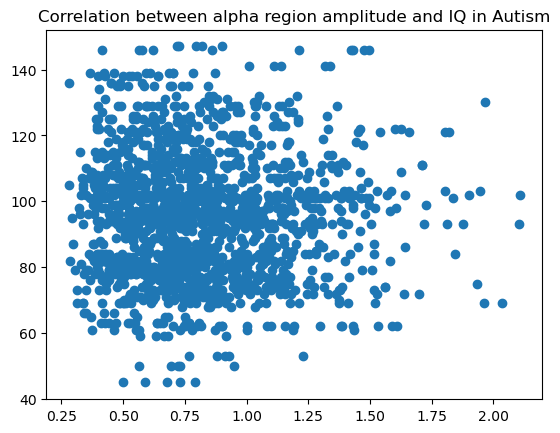

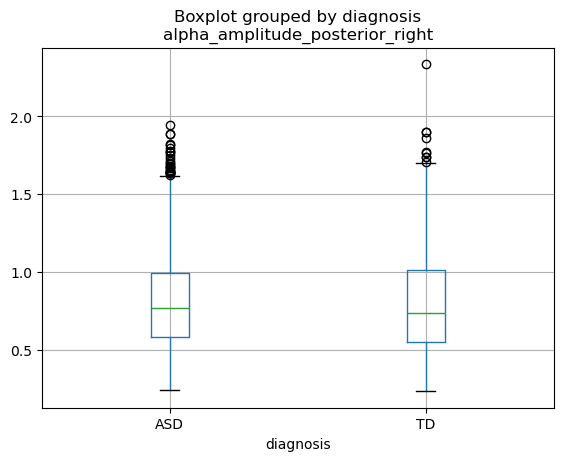

PearsonRResult(statistic=-0.05875006822420135, pvalue=0.017824476366953182)


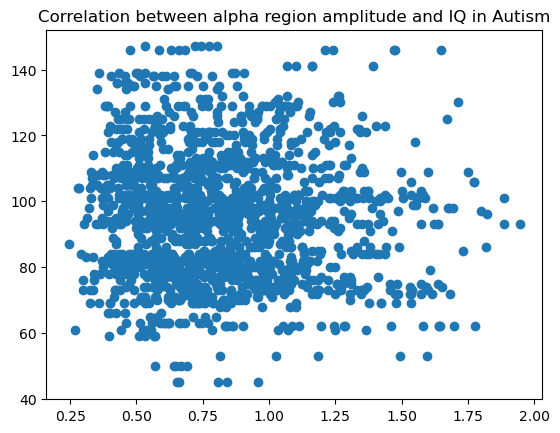

In [6]:
# For every region:
# 1) Plot case-control differences in the parameter
# 2) Compute for every region the correlation between parameter value and FIQ in ASD group.
#    This is done to explore the hypothesized association between alpha amplitude and cognitive development in Autism.

for region in channel_dict.keys():

    region_column = f"{parameter}_{region}"

    # Plot boxplot
    data.boxplot(column=region_column, by='diagnosis')
    plt.show()

    # Plot scatter 
    plt.scatter(asd_data[region_column], asd_data['fiq'])
    plt.title('Correlation between alpha region amplitude and IQ in Autism')

    # Remove NA
    asd_data_clean = asd_data.dropna(subset=[region_column, 'fiq'])

    # Compute pearson correlation
    r_pears = stats.pearsonr(asd_data_clean[region_column], asd_data_clean['fiq'])
    print(r_pears)



In [7]:
# For every region compute a mixed linear model with diagnosis and rs time point (1,2,3,4,5) as fixed effect and subject 
# as random effect
from statsmodels.formula.api import mixedlm

for region in channel_dict.keys():
  
    # Get region name
    region_column = f"{parameter}_{region}"
    filtered_data = data[data[region_column].notnull()] # Remove missing values

    # Generate formula and model
    model_formula = f"{region_column} ~ diagnosis * rs_block"
    model = mixedlm(model_formula, filtered_data, groups=filtered_data["subid"])

    # Fit the model
    result = model.fit()

    # Print the summary of the model
    print(region_column)
    print(result.summary())

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_frontal_left
                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_frontal_left
No. Observations: 2836    Method:             REML                        
No. Groups:       2836    Scale:              0.0343                      
Min. group size:  1       Log-Likelihood:     -239.7933                   
Max. group size:  1       Converged:          Yes                         
Mean group size:  1.0                                                     
---------------------------------------------------------------------------
                            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------------
Intercept                    0.680     0.015  46.037  0.000   0.651   0.708
diagnosis[T.TD]              0.014     0.024   0.596  0.551  -0.032   0.061
rs_block                    -0.002     0.004  -0.344  0.731  -0.010   0.007
diagnosis

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_frontal_midline
                    Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_frontal_midline
No. Observations: 2856    Method:             REML                           
No. Groups:       2856    Scale:              0.0334                         
Min. group size:  1       Log-Likelihood:     -202.2697                      
Max. group size:  1       Converged:          Yes                            
Mean group size:  1.0                                                        
------------------------------------------------------------------------------
                              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
------------------------------------------------------------------------------
Intercept                      0.675     0.002  448.327  0.000   0.672   0.678
diagnosis[T.TD]               -0.010     0.019   -0.509  0.611  -0.048   0.028
rs_block                      -0.001     0.002 

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_frontal_right
                   Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_frontal_right
No. Observations: 2835    Method:             REML                         
No. Groups:       2835    Scale:              0.0334                       
Min. group size:  1       Log-Likelihood:     -199.8426                    
Max. group size:  1       Converged:          Yes                          
Mean group size:  1.0                                                      
----------------------------------------------------------------------------
                             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                     0.685     0.011  63.872  0.000   0.664   0.706
diagnosis[T.TD]              -0.014     0.012  -1.174  0.240  -0.039   0.010
rs_block                     -0.004     0.003  -1.595  0.111  -0.009   0

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_central_left
                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_central_left
No. Observations: 2899    Method:             REML                        
No. Groups:       2899    Scale:              0.0478                      
Min. group size:  1       Log-Likelihood:     -726.1015                   
Max. group size:  1       Converged:          Yes                         
Mean group size:  1.0                                                     
---------------------------------------------------------------------------
                           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   0.806     0.005  146.969  0.000   0.795   0.816
diagnosis[T.TD]             0.003     0.016    0.198  0.843  -0.028   0.034
rs_block                   -0.010     0.003   -3.432  0.001  -0.016  -0.004
diagnosis

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_central_midline
                    Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_central_midline
No. Observations: 2900    Method:             REML                           
No. Groups:       2900    Scale:              0.0325                         
Min. group size:  1       Log-Likelihood:     -166.9576                      
Max. group size:  1       Converged:          Yes                            
Mean group size:  1.0                                                        
------------------------------------------------------------------------------
                              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
------------------------------------------------------------------------------
Intercept                      0.722     0.005  146.897  0.000   0.713   0.732
diagnosis[T.TD]               -0.000     0.012   -0.003  0.998  -0.024   0.024
rs_block                      -0.002     0.002 

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_central_right
                   Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_central_right
No. Observations: 2899    Method:             REML                         
No. Groups:       2899    Scale:              0.0485                       
Min. group size:  1       Log-Likelihood:     -745.9789                    
Max. group size:  1       Converged:          Yes                          
Mean group size:  1.0                                                      
----------------------------------------------------------------------------
                             Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                     0.802     0.017  46.343  0.000   0.768   0.836
diagnosis[T.TD]               0.002     0.028   0.079  0.937  -0.052   0.057
rs_block                     -0.008     0.005  -1.558  0.119  -0.018   0

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


alpha_amplitude_posterior_midline
                     Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_posterior_midline
No. Observations: 2890    Method:             REML                             
No. Groups:       2890    Scale:              0.0473                           
Min. group size:  1       Log-Likelihood:     -708.0177                        
Max. group size:  1       Converged:          Yes                              
Mean group size:  1.0                                                          
---------------------------------------------------------------------------------
                            Coef.    Std.Err.      z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                    0.821      0.003   293.938   0.000    0.816    0.827
diagnosis[T.TD]             -0.029      0.021    -1.371   0.170   -0.071    0.012
rs_block         

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

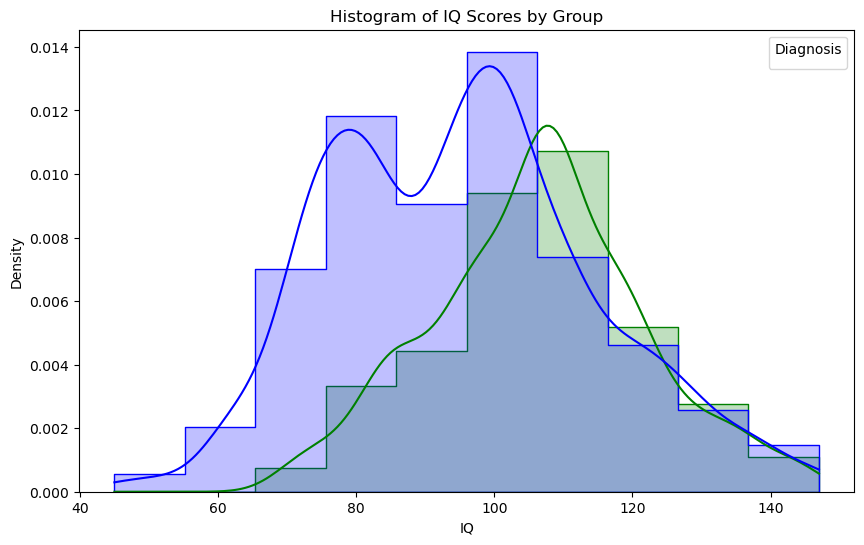

In [82]:
# Now, I want to explore full scale iq data distribution for the two groups.
# If ASD show a multiple-peak density distribution, I'm proceeding with subgrouping them based on IQ.

# Custom color palette
custom_palette = {'ASD': 'blue', 'TD': 'green'}

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data, x='fiq', hue='diagnosis', kde=True, bins=10, palette=custom_palette, element='step', stat='density')


# Adding labels and title
plt.xlabel('IQ')
plt.ylabel('Density')
plt.title('Histogram of IQ Scores by Group')
plt.legend(title='Diagnosis')

# Show the plot
plt.show()


/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.1

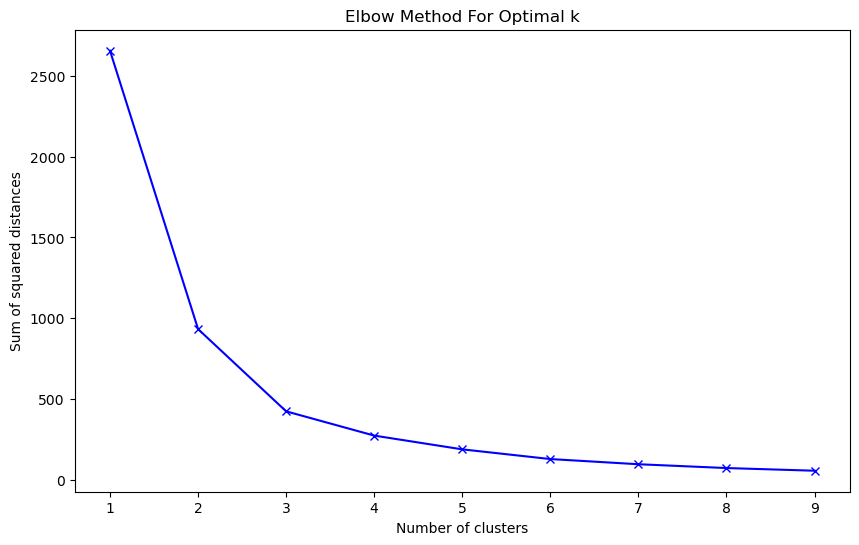

/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_50158/3592874237.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd_data['Cluster'] = clusters
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(

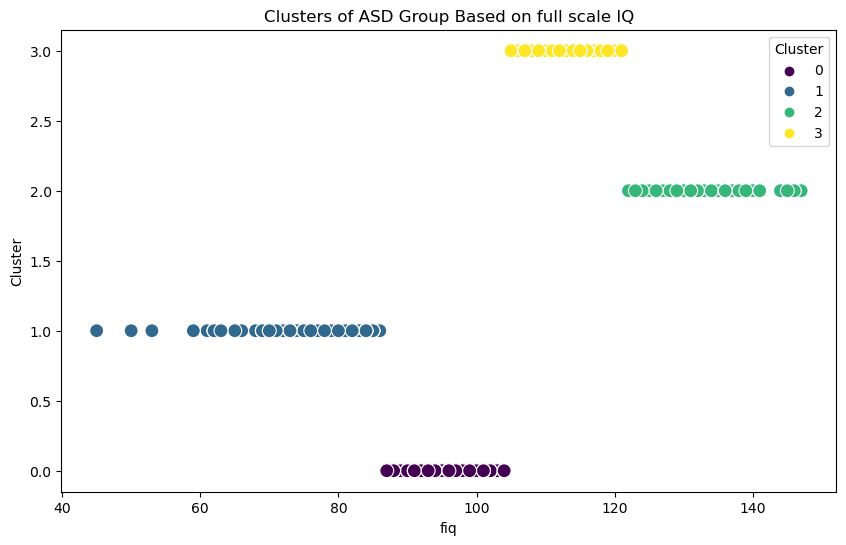

In [9]:
# ASD iq data show two peaks.
# Now, I'm perform k-means clustering (k-optimal = 2) to autism cluster subjects based on IQ

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter the data to include only the ASD group
asd_data = data[data['diagnosis'] == 'ASD']
asd_data = data[data['fiq'].notnull()] 


# Get all subjects IQ
fiq_scores = asd_data[['fiq']]

# Standardize the data
scaler = StandardScaler()
fiq_scores_scaled = scaler.fit_transform(fiq_scores)

# Determine the number of clusters using the elbow method
sum_of_squared_distances = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(fiq_scores_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# From the elbow plot, choose an appropriate number of clusters (e.g., 3)
optimal_k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k)
clusters = kmeans.fit_predict(fiq_scores_scaled)

# Add the cluster labels to the original data
asd_data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fiq', y='Cluster', data=asd_data, hue='Cluster', palette='viridis', s=100)
plt.xlabel('fiq')
plt.ylabel('Cluster')
plt.title('Clusters of ASD Group Based on full scale IQ')
plt.legend(title='Cluster')
plt.show()



/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/inesseverino/anaconda3/envs/explore_cmifoof/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


0       0
1       0
2       0
3       3
4       2
       ..
2920    0
2921    0
2922    1
2923    3
2924    0
Name: Cluster, Length: 2655, dtype: int32

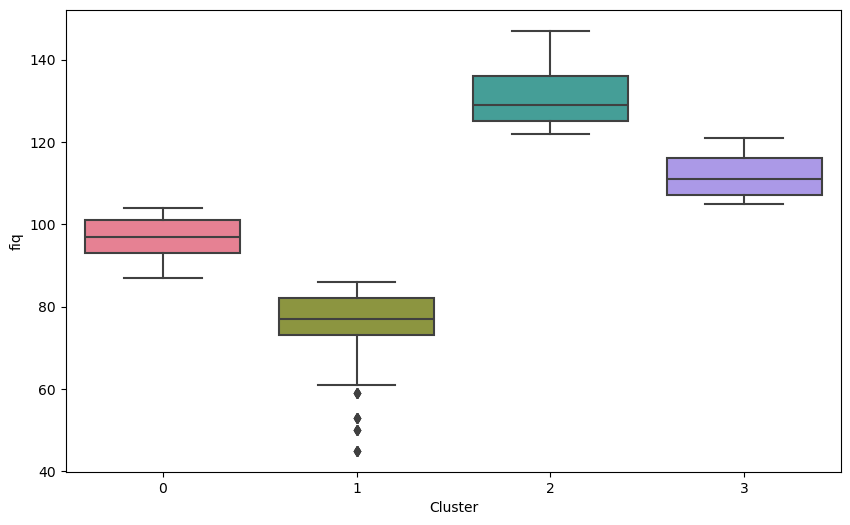

In [10]:
# Show clusters and their FIQ pattern

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='fiq', data=asd_data, palette='husl')

asd_data['Cluster']

In [11]:
# Give labels to clusters
asd_data['FIQ_subgroup'] = asd_data['Cluster'].map({0: 'HIGH', 1: 'LOW', 2: 'VERY_HIGH', 3:'VERY_LOW'})

# Add fake cluster label also to TD group
td_data['Cluster'] = 85 #arbitrary number to fill the column
td_data['FIQ_subgroup'] = "TD"

# Concatenate vertically ASD and TD dataframe (stack rows)
all_data_subgroups = pd.concat([asd_data, td_data], axis=0, ignore_index=True)


/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_50158/2325449167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asd_data['FIQ_subgroup'] = asd_data['Cluster'].map({0: 'HIGH', 1: 'LOW', 2: 'VERY_HIGH', 3:'VERY_LOW'})
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_50158/2325449167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td_data['Cluster'] = 85 #arbitrary number to fill the column
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_50158/2325449167.py:6: SettingWi

In [12]:
# Initialize function to compute pairwise comparisons

from scipy import stats



def pairwise_comparisons(coefficients, std_errors, labels):
    num_groups = len(coefficients)
    comp_results = []
    for i in range(num_groups):
        for j in range(i + 1, num_groups):
            # Difference in coefficients
            effect_diff = coefficients[i] - coefficients[j]
            # Standard error of the difference
            se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)
            # Z-score
            z = effect_diff / se_diff
            # Two-tailed p-value
            p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
            comp_results.append((labels[i], labels[j], effect_diff, se_diff, z, p_value))
    return comp_results




In [110]:
# For every region compute a mixed linear model with FIQ subtype and rs time point (1,2,3,4,5) as fixed effect and subject 
# as random effect

for region in channel_dict.keys():

    
    region_column = f"{parameter}_{region}"
    filtered_data = all_data_subgroups[all_data_subgroups[region_column].notnull()]

    model_formula = f"{region_column} ~ FIQ_subgroup * rs_block"
    model = mixedlm(model_formula, filtered_data, groups=filtered_data["subid"])

    # Fit the model
    result = model.fit()

    # Print the summary of the model
    print(region_column)
    print(result.summary())

    #
    coefficients = result.fe_params[1:5]
    std_errors = result.bse_fe[1:5]

    labels = ['LOW', 'TD', 'VERY_HIGH', 'VERY_LOW']

    # Perform pairwise comparisons
    comparisons = pairwise_comparisons(coefficients, std_errors, labels)

    # Print results
    for comp in comparisons:
        print(f"Comparison: {comp[0]} vs {comp[1]}")
        print(f"  Effect Difference: {comp[2]:.3f}")
        print(f"  SE Difference: {comp[3]:.3f}")
        print(f"  Z-Score: {comp[4]:.3f}")
        print(f"  P-Value: {comp[5]:.3f}")
        print()

alpha_amplitude_frontal_left
                    Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  alpha_amplitude_frontal_left
No. Observations:  3708     Method:              REML                        
No. Groups:        555      Scale:               0.0586                      
Min. group size:   2        Log-Likelihood:      -708.0786                   
Max. group size:   10       Converged:           Yes                         
Mean group size:   6.7                                                       
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           0.913    0.028 32.703 0.000  0.858  0.968
FIQ_subgroup[T.LOW]                 0.164    0.036  4.631 0.000  0.095  0.234
FIQ_subgroup[T.TD]                 -0.253    0.031 -8.2

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_frontal_midline
                    Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_frontal_midline
No. Observations: 3707    Method:             REML                           
No. Groups:       555     Scale:              0.0583                         
Min. group size:  2       Log-Likelihood:     -722.9748                      
Max. group size:  10      Converged:          Yes                            
Mean group size:  6.7                                                        
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           0.915    0.028 32.396 0.000  0.859  0.970
FIQ_subgroup[T.LOW]                 0.180    0.036  5.062 0.000  0.111  0.250
FIQ_subgroup[T.TD]                 -0.274    0.031 -

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_frontal_right
                    Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: alpha_amplitude_frontal_right
No. Observations:   3689    Method:             REML                         
No. Groups:         555     Scale:              0.0560                       
Min. group size:    3       Log-Likelihood:     -640.4114                    
Max. group size:    10      Converged:          Yes                          
Mean group size:    6.6                                                      
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           0.931    0.028 33.785 0.000  0.877  0.985
FIQ_subgroup[T.LOW]                 0.136    0.035  3.880 0.000  0.067  0.204
FIQ_subgroup[T.TD]                 -0.280    0.030 -9.

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_central_left
                    Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  alpha_amplitude_central_left
No. Observations:  3722     Method:              REML                        
No. Groups:        555      Scale:               0.0522                      
Min. group size:   3        Log-Likelihood:      -457.6798                   
Max. group size:   10       Converged:           Yes                         
Mean group size:   6.7                                                       
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           0.916    0.026 35.604 0.000  0.866  0.967
FIQ_subgroup[T.LOW]                 0.150    0.033  4.532 0.000  0.085  0.215
FIQ_subgroup[T.TD]                 -0.123    0.029 -4.2

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_central_midline
                    Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_central_midline
No. Observations: 3726    Method:             REML                           
No. Groups:       555     Scale:              0.0478                         
Min. group size:  3       Log-Likelihood:     -329.8198                      
Max. group size:  10      Converged:          Yes                            
Mean group size:  6.7                                                        
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           0.901    0.025 35.796 0.000  0.851  0.950
FIQ_subgroup[T.LOW]                 0.179    0.032  5.589 0.000  0.116  0.242
FIQ_subgroup[T.TD]                 -0.202    0.028 -

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_central_right
                    Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: alpha_amplitude_central_right
No. Observations:   3726    Method:             REML                         
No. Groups:         555     Scale:              0.0515                       
Min. group size:    3       Log-Likelihood:     -424.6930                    
Max. group size:    10      Converged:          Yes                          
Mean group size:    6.7                                                      
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           0.916    0.025 35.963 0.000  0.866  0.966
FIQ_subgroup[T.LOW]                 0.143    0.033  4.332 0.000  0.078  0.207
FIQ_subgroup[T.TD]                 -0.120    0.029 -4.

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_posterior_left
                    Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: alpha_amplitude_posterior_left
No. Observations:  3724    Method:             REML                          
No. Groups:        555     Scale:              0.0570                        
Min. group size:   3       Log-Likelihood:     -670.2993                     
Max. group size:   10      Converged:          Yes                           
Mean group size:   6.7                                                       
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           1.032    0.028 37.309 0.000  0.978  1.086
FIQ_subgroup[T.LOW]                 0.165    0.035  4.694 0.000  0.096  0.233
FIQ_subgroup[T.TD]                 -0.251    0.030 -8

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_posterior_midline
                     Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_posterior_midline
No. Observations: 3723    Method:             REML                             
No. Groups:       555     Scale:              0.0660                           
Min. group size:  3       Log-Likelihood:     -984.1479                        
Max. group size:  10      Converged:          Yes                              
Mean group size:  6.7                                                          
-------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                            1.140    0.031  37.326 0.000  1.080  1.200
FIQ_subgroup[T.LOW]                  0.172    0.038   4.516 0.000  0.097  0.247
FIQ_subgroup[T.TD]         

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)


alpha_amplitude_posterior_right
                    Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: alpha_amplitude_posterior_right
No. Observations: 3738    Method:             REML                           
No. Groups:       555     Scale:              0.0591                         
Min. group size:  3       Log-Likelihood:     -757.9405                      
Max. group size:  10      Converged:          Yes                            
Mean group size:  6.7                                                        
-----------------------------------------------------------------------------
                                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------
Intercept                           1.085    0.028 38.064 0.000  1.029  1.141
FIQ_subgroup[T.LOW]                 0.163    0.036  4.549 0.000  0.093  0.233
FIQ_subgroup[T.TD]                 -0.297    0.031 -

/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  effect_diff = coefficients[i] - coefficients[j]
/var/folders/c2/13fcv74s5yb2lw24_hcwv4jh0000gn/T/ipykernel_3068/3010389982.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_diff = np.sqrt(std_errors[i]**2 + std_errors[j]**2)
